In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
clim_df = pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")
# Data preprocessing and checking for missing values (No NaN values)



# Checking for data types and normalize if necessary (Int64,Object,float64)
# Geographical identifiers(Year, Country, Region)
# Climatic & Environmental factors (Crop_type, Average_Temperature,Total_Precipitation, CO2_Emissions_MT)
# Agricultural productivity and input data (Fertilizer_usage, Soil_Health_Index)
# Climate-related challenges and adaptive responses(Extreme_weather_events, Adaptation_Strategies)
# Economic consequences(Economic_Impact_Million_USD)


# clim_df.info()
clim_df.head()


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [4]:
#sort values based on year to tidy the data for ease of analysis
clim_df['Year'].sort_values(ascending=True)
# clim_df.head()
clim_df['Year'] = clim_df['Year'].sort_values(ascending=True)
clim_df = clim_df.sort_values(by='Year')



In [39]:
clim_df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2007.09,15.24,1611.66,15.25,2.24,4.98,55.25,24.96,49.97,64.90,674.27
std,10.08,11.47,805.02,8.59,1.00,3.17,25.99,14.49,28.71,20.20,414.59
min,1990.00,-4.99,200.15,0.50,0.45,0.00,10.01,0.00,0.01,30.00,47.84
25%,1999.00,5.43,925.70,7.76,1.45,2.00,32.68,12.53,25.39,47.23,350.55
50%,2007.00,15.18,1611.16,15.20,2.17,5.00,55.17,24.93,49.64,64.65,583.92
75%,2016.00,25.34,2307.00,22.82,2.93,8.00,77.58,37.47,74.82,82.47,917.50
max,2024.00,35.00,2999.67,30.00,5.00,10.00,99.99,49.99,99.99,100.00,2346.47


                         Average_Temperature_C  Total_Precipitation_mm  \
Average_Temperature_C                 1.000000                0.007213   
Total_Precipitation_mm                0.007213                1.000000   
CO2_Emissions_MT                     -0.003052               -0.008681   
Crop_Yield_MT_per_HA                  0.263781                0.029728   
Soil_Health_Index                    -0.010841               -0.021621   
Pesticide_Use_KG_per_HA               0.005764                0.011198   
Irrigation_Access_%                  -0.013268               -0.007580   

                         CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
Average_Temperature_C           -0.003052              0.263781   
Total_Precipitation_mm          -0.008681              0.029728   
CO2_Emissions_MT                 1.000000             -0.089868   
Crop_Yield_MT_per_HA            -0.089868              1.000000   
Soil_Health_Index                0.004518             -0.005692   
Pesti

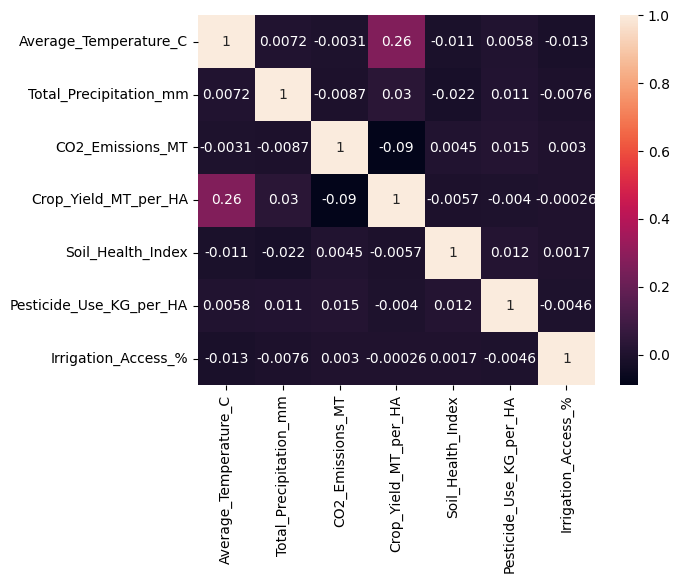

In [5]:
# clim_df.head()
# clim_df.describe()
# clim_df.info()
#
# -------correlation analysis-----
# Checking for relationship between two variables and how they move together
# Values close to +1 indicate a strong positive linear relationship and vice versa
# Negative correlation means that one when one value increases the other decreases
# 0 means there's no linear correlation
# 0.7 to 1.0 or -0.7 to -1.0: Strong correlation.
# 0.3 to 0.7 or -0.3 to -0.7: Moderate correlation.
# 0 to 0.3 or -0.3 to 0: Weak correlation.
# Used heatmaps to show the strength of relationships between variables
cols_corr = ['Average_Temperature_C','Total_Precipitation_mm','CO2_Emissions_MT','Crop_Yield_MT_per_HA','Soil_Health_Index','Pesticide_Use_KG_per_HA','Irrigation_Access_%']
print(clim_df[cols_corr].corr())
sns.heatmap(clim_df[cols_corr].corr(), annot=True)

pd.options.display.max_columns = 20
pd.options.display.max_rows = 500


In [6]:
# clim_df['Total_Precipitation_mm'].median()
# clim_df['Country'].value_counts()

#------Groupby will split all the results by country name
country_grp = clim_df.groupby('Country')
country_grp.get_group('Nigeria')


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
7343,1990,Nigeria,North West,Barley,30.02,1900.22,15.67,3.402,9,40.47,31.58,44.36,77.78,Organic Farming,1149.29
7186,1990,Nigeria,South West,Rice,9.10,1404.53,21.83,1.890,7,65.74,9.89,79.76,98.42,Water Management,384.27
7102,1990,Nigeria,North Central,Sugarcane,18.68,2904.06,3.42,3.680,7,61.66,10.96,20.49,34.79,Crop Rotation,849.47
2279,1990,Nigeria,North West,Barley,-0.92,1081.11,14.02,2.430,5,17.30,42.33,68.93,41.63,Drought-resistant Crops,426.64
2424,1990,Nigeria,North Central,Coffee,21.67,1718.62,6.01,2.820,8,89.20,46.95,57.81,70.11,Organic Farming,819.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,2024,Nigeria,North West,Rice,0.70,472.59,11.18,2.205,2,62.78,13.39,87.69,98.47,Organic Farming,648.51
4757,2024,Nigeria,North West,Rice,11.70,1263.96,29.57,3.618,5,13.68,18.33,68.81,92.02,Organic Farming,767.86
904,2024,Nigeria,North Central,Rice,31.92,1150.89,11.25,1.290,3,54.95,37.75,14.93,50.93,No Adaptation,522.85
341,2024,Nigeria,South East,Coffee,28.80,966.11,6.05,1.130,2,76.96,26.48,98.23,53.95,No Adaptation,234.91


In [7]:
clim_df.columns.to_list()

['Year',
 'Country',
 'Region',
 'Crop_Type',
 'Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Yield_MT_per_HA',
 'Extreme_Weather_Events',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA',
 'Soil_Health_Index',
 'Adaptation_Strategies',
 'Economic_Impact_Million_USD']

In [8]:
#------You can filter out if you're looking for a specific country
country_filt = clim_df['Country'] == 'Nigeria'
clim_df.loc[country_filt]['Crop_Yield_MT_per_HA'].value_counts()


,count
Crop_Yield_MT_per_HA,
2.430,7
1.620,7
1.960,6
2.970,5
3.384,5
...,...
1.230,1
2.720,1
4.122,1


In [9]:
# country_grp['Economic_Impact_Million_USD'].agg(['median', 'mean']).loc["USA"]


In [10]:
country_grp['Adaptation_Strategies'].apply(lambda x: x.str.contains('Water').value_counts())




Country    Argentina
Argentina  False        776
           True         208
Australia  False        811
           True         221
Brazil     False        735
           True         209
Canada     False        802
           True         182
China      False        818
           True         213
France     False        774
           True         204
India      False        828
           True         197
Nigeria    False        825
           True         204
Russia     False        777
           True         184
USA        False        805
           True         227
Name: Adaptation_Strategies, dtype: int64

In [11]:
# clim_df.rename(columns={"Year":"Year_Period"})
clim_df['Year'].sort_values(ascending=True)

,Year
4225,1990
2050,1990
2032,1990
6080,1990
6051,1990
...,...
8134,2024
3281,2024
8517,2024
6280,2024


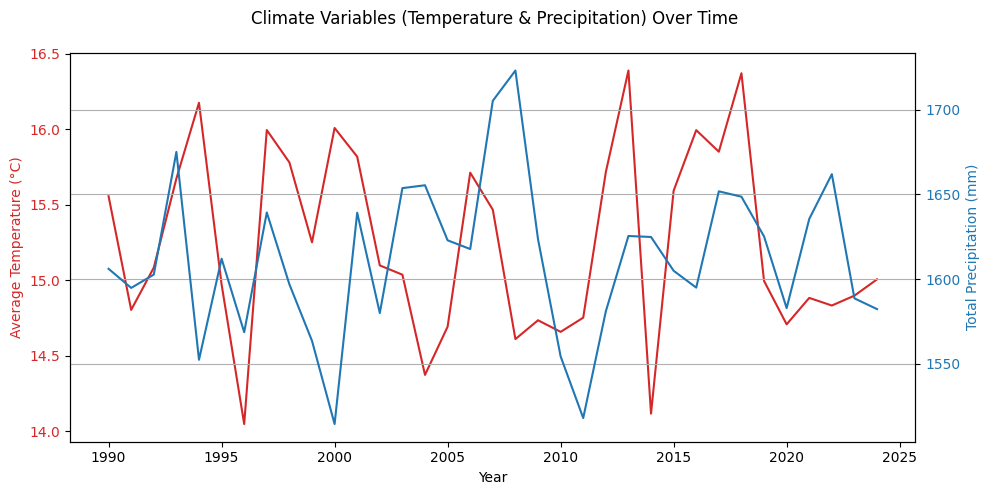

(       Average_Temperature_C  Total_Precipitation_mm
 count              35.000000               35.000000
 mean               15.246678             1612.164662
 std                 0.623391               45.868153
 min                14.048000             1514.458803
 25%                14.777608             1582.544386
 50%                15.083139             1611.994007
 75%                15.747141             1639.185129
 max                16.387443             1723.023584,
       Average_Temperature_C  Total_Precipitation_mm
 Year                                               
 2020              14.707878             1582.831691
 2021              14.882740             1635.461336
 2022              14.832326             1661.873681
 2023              14.897823             1588.608299
 2024              15.005694             1582.257082)

In [12]:
# clim_df['Year']=pd.to_datetime(clim_df['Year'], format='%Y')
# clim_df['Year']
# clim_df.loc[8000,'Year'].day_name()
# clim_df['Year'].dt.day_name()
# clim_df['Country'].unique()
clim_df.head(), clim_df.columns

# Group data by year and calculate the mean for temperature and precipitation
climate_trends = clim_df.groupby("Year")[["Average_Temperature_C", "Total_Precipitation_mm"]].mean()

# Plot the trends for temperature and precipitation over time
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot average temperature trend
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:red')
ax1.plot(climate_trends.index, climate_trends["Average_Temperature_C"], color='tab:red', label='Avg Temp (°C)')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis to plot precipitation on the same graph
ax2 = ax1.twinx()
ax2.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax2.plot(climate_trends.index, climate_trends["Total_Precipitation_mm"], color='tab:blue', label='Precipitation (mm)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add a title and grid
fig.suptitle('Climate Variables (Temperature & Precipitation) Over Time')
fig.tight_layout()
plt.grid(visible=True)

# Show the plot
plt.show()

# Inspect the trends numerically to confirm patterns
climate_trends.describe(), climate_trends.tail()

#Temperature
# There's a slight upward trend in average temperature over the year
# Mean temperature is around 15.25 degrees, with a max of 15.01 degrees. Positive trend

# There's fluctuation in within range 1514 and 1723 mm
# There's isn't a clear upward or downward pattern indicating relatively stable rainfall over the years




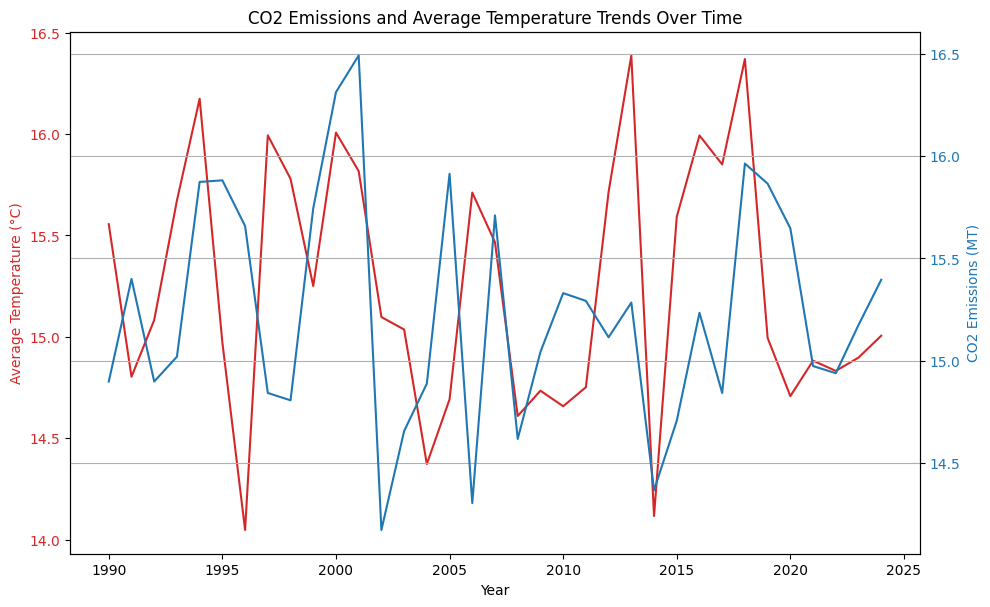

In [13]:

# Group data by year and calculate the mean for the desired climate variables
climate_trends = clim_df.groupby("Year")[["Average_Temperature_C", "CO2_Emissions_MT"]].mean()

# Create the line chart with a focus on CO2 and Temperature
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average temperature trend on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color=color)
ax1.plot(climate_trends.index, climate_trends["Average_Temperature_C"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis to plot CO2 emissions
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('CO2 Emissions (MT)', color=color)  # we already handled the x-label with ax1
ax2.plot(climate_trends.index, climate_trends["CO2_Emissions_MT"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Customize the chart
fig.tight_layout()
plt.title("CO2 Emissions and Average Temperature Trends Over Time")
plt.grid(True)

# Show the plot
plt.show()

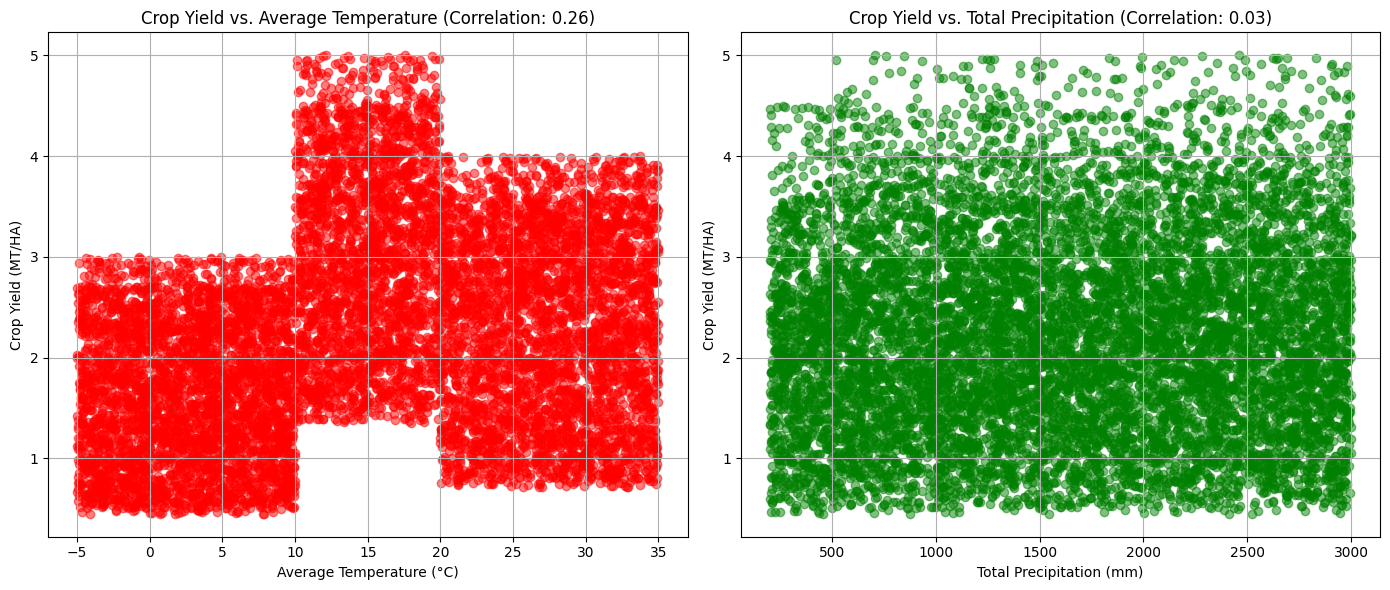

(0.26378072469850977, 0.029727512427541625)

In [14]:
# Exploring Climate variables impact on crop yield over time.
# Average temperature to check if higher or lower temperature affect yield
# Total precipitation to understand the effect of rainfall on crop productivity

# Calculate the correlation between crop yield and climate variables (temperature and precipitation)
correlation_temp = clim_df['Average_Temperature_C'].corr(clim_df['Crop_Yield_MT_per_HA'])
correlation_precip = clim_df['Total_Precipitation_mm'].corr(clim_df['Crop_Yield_MT_per_HA'])

# Plot crop yield vs. average temperature
plt.figure(figsize=(14, 6))

# Subplot 1: Crop yield vs. Average Temperature
plt.subplot(1, 2, 1)
plt.scatter(clim_df['Average_Temperature_C'], clim_df['Crop_Yield_MT_per_HA'], color='r', alpha=0.5)
plt.title(f'Crop Yield vs. Average Temperature (Correlation: {correlation_temp:.2f})', fontsize=12)
plt.xlabel('Average Temperature (°C)', fontsize=10)
plt.ylabel('Crop Yield (MT/HA)', fontsize=10)
plt.grid(True)

# Subplot 2: Crop yield vs. Total Precipitation
plt.subplot(1, 2, 2)
plt.scatter(clim_df['Total_Precipitation_mm'], clim_df['Crop_Yield_MT_per_HA'], color='g', alpha=0.5)
plt.title(f'Crop Yield vs. Total Precipitation (Correlation: {correlation_precip:.2f})', fontsize=12)
plt.xlabel('Total Precipitation (mm)', fontsize=10)
plt.ylabel('Crop Yield (MT/HA)', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

(correlation_temp, correlation_precip)

# Crop yield and Average temperature have a 0.26 correlation coefficient indicating a weak positive relationship between temp and crop yield
# Crop yield and total precipitation have a 0.03 suggesting almost no linear relationship between precipitation and crop yield
# Temperature has a slight impact on crop yield precipitation alone might not significantly influence yield.


In [19]:
# Group the data by Region and Crop_Type, and calculate correlations for each group
regions = clim_df.groupby('Region')
crops = clim_df.groupby('Crop_Type')

# Calculate the correlation between climate variables (temperature, precipitation) and crop yield for each region
region_correlations = regions.apply(lambda x: pd.Series({
    'Temp_Corr': x['Average_Temperature_C'].corr(x['Crop_Yield_MT_per_HA']),
    'Precip_Corr': x['Total_Precipitation_mm'].corr(x['Crop_Yield_MT_per_HA'])
}))

# Calculate the correlation between climate variables and crop yield for each crop type
crop_correlations = crops.apply(lambda x: pd.Series({
    'Temp_Corr': x['Average_Temperature_C'].corr(x['Crop_Yield_MT_per_HA']),
    'Precip_Corr': x['Total_Precipitation_mm'].corr(x['Crop_Yield_MT_per_HA'])
}))

# Display the results
region_correlations, crop_correlations


(                            Temp_Corr  Precip_Corr
 Region                                            
 British Columbia             0.297056     0.045339
 Central                      0.262094     0.088744
 East                         0.222293     0.044162
 Grand Est                    0.294405     0.083898
 Ile-de-France                0.289688     0.125273
 Maharashtra                  0.239735     0.028918
 Midwest                      0.302040    -0.033053
 New South Wales              0.250191     0.002459
 North                        0.281537    -0.046116
 North Central                0.353628     0.137509
 North West                   0.279528     0.015014
 Northeast                    0.270608     0.043579
 Northwest                    0.147657    -0.003962
 Northwestern                 0.224189     0.003250
 Nouvelle-Aquitaine           0.326464     0.024376
 Ontario                      0.290257     0.076204
 Pampas                       0.259566    -0.006824
 Patagonia  

In [25]:
# Group by country and calculate the average total precipitation and crop yield
country_productivity = clim_df.groupby('Country')[['Total_Precipitation_mm', 'Crop_Yield_MT_per_HA']].mean().reset_index()

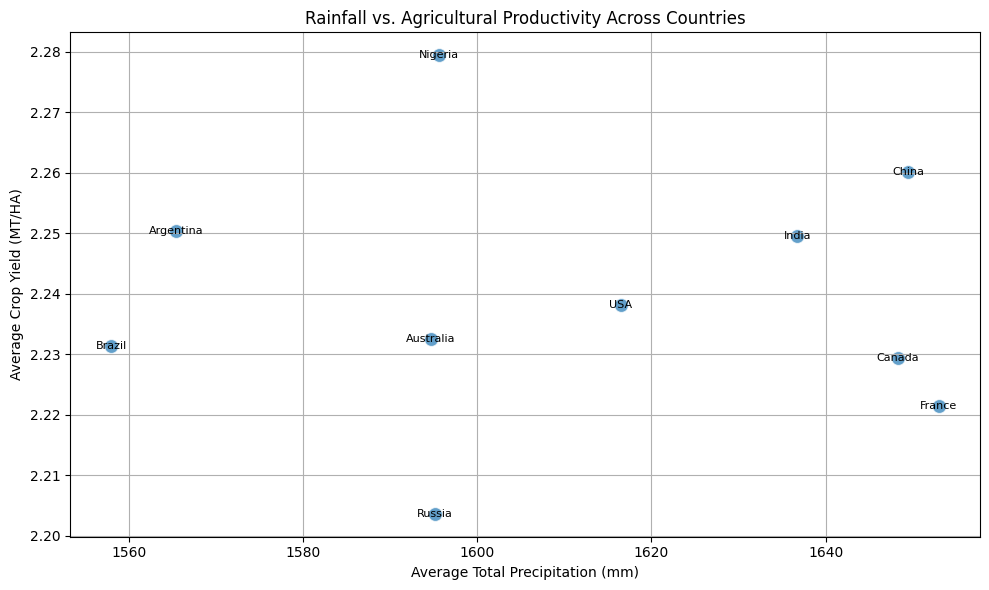

In [27]:

# Create a scatter plot with country names
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', data=country_productivity, s=100, alpha=0.7)

# Add country names as annotations
for i in range(country_productivity.shape[0]):
    plt.text(country_productivity.Total_Precipitation_mm[i], country_productivity.Crop_Yield_MT_per_HA[i], country_productivity.Country[i], fontsize=8, ha='center', va='center')

plt.title('Rainfall vs. Agricultural Productivity Across Countries')
plt.xlabel('Average Total Precipitation (mm)')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.grid(True)
plt.tight_layout()
plt.show()

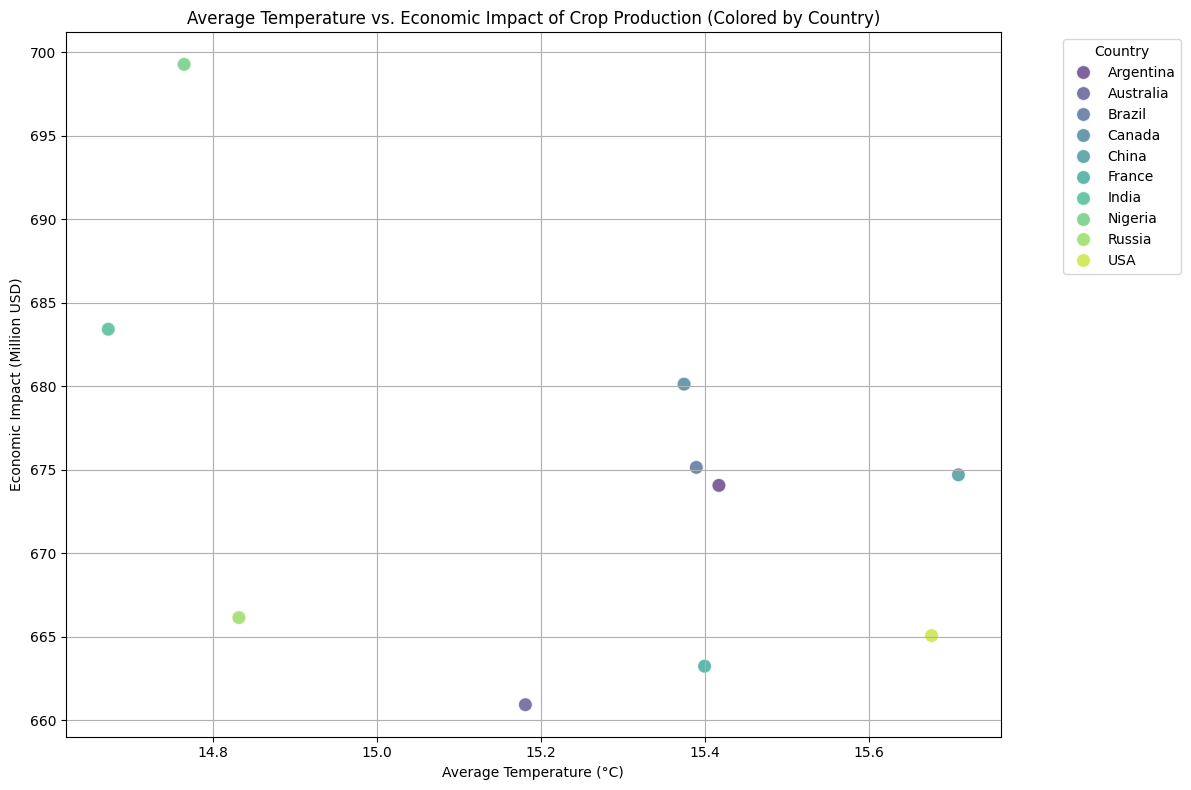

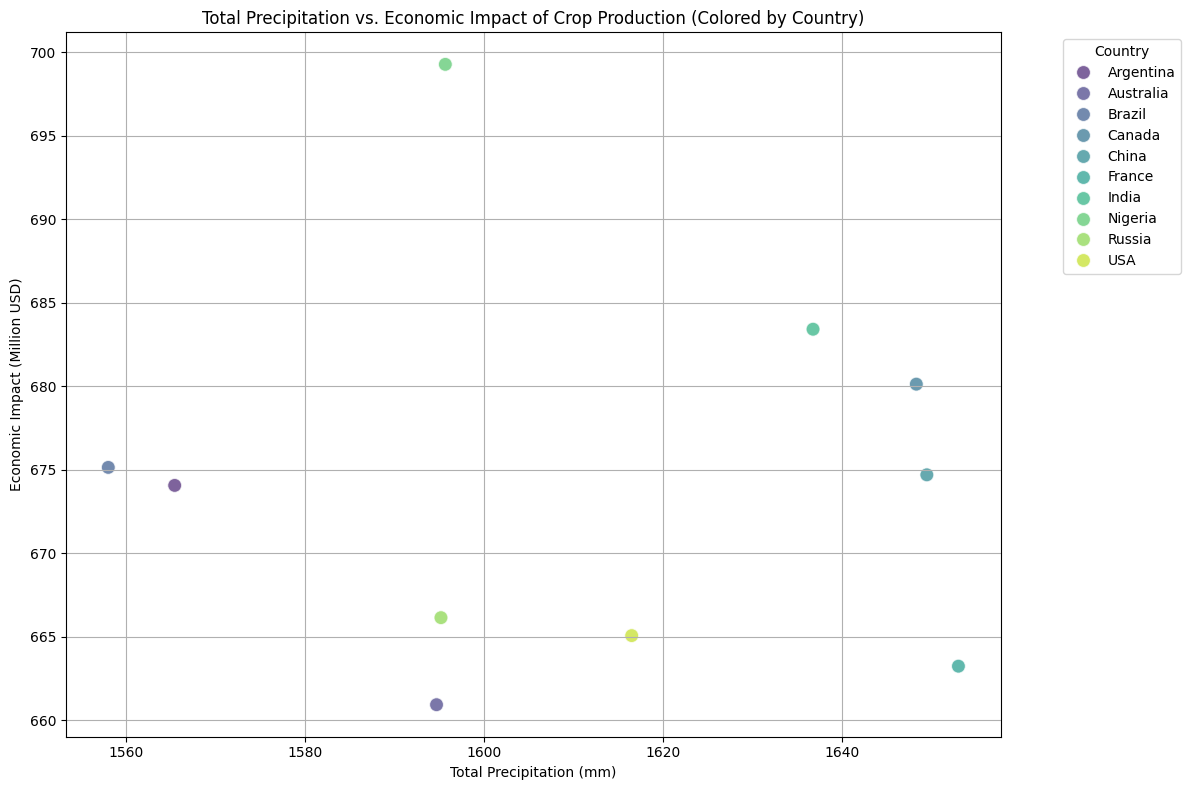

In [28]:
# Group data by country and calculate the mean economic impact and climate variables
country_economic_impact = clim_df.groupby('Country')[['Economic_Impact_Million_USD', 'Average_Temperature_C', 'Total_Precipitation_mm']].mean().reset_index()


# Create a scatter plot with color-coding by country
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Scatter plot for temperature vs. economic impact
sns.scatterplot(x='Average_Temperature_C', y='Economic_Impact_Million_USD', hue='Country', data=country_economic_impact, s=100, alpha=0.7, palette='viridis')  # s=marker size, alpha=transparency
plt.title('Average Temperature vs. Economic Impact of Crop Production (Colored by Country)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Economic Impact (Million USD)')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position as needed
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for precipitation vs. economic impact
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.scatterplot(x='Total_Precipitation_mm', y='Economic_Impact_Million_USD', hue='Country', data=country_economic_impact, s=100, alpha=0.7, palette='viridis')  # s=marker size, alpha=transparency
plt.title('Total Precipitation vs. Economic Impact of Crop Production (Colored by Country)')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Economic Impact (Million USD)')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position as needed
plt.grid(True)
plt.tight_layout()
plt.show()

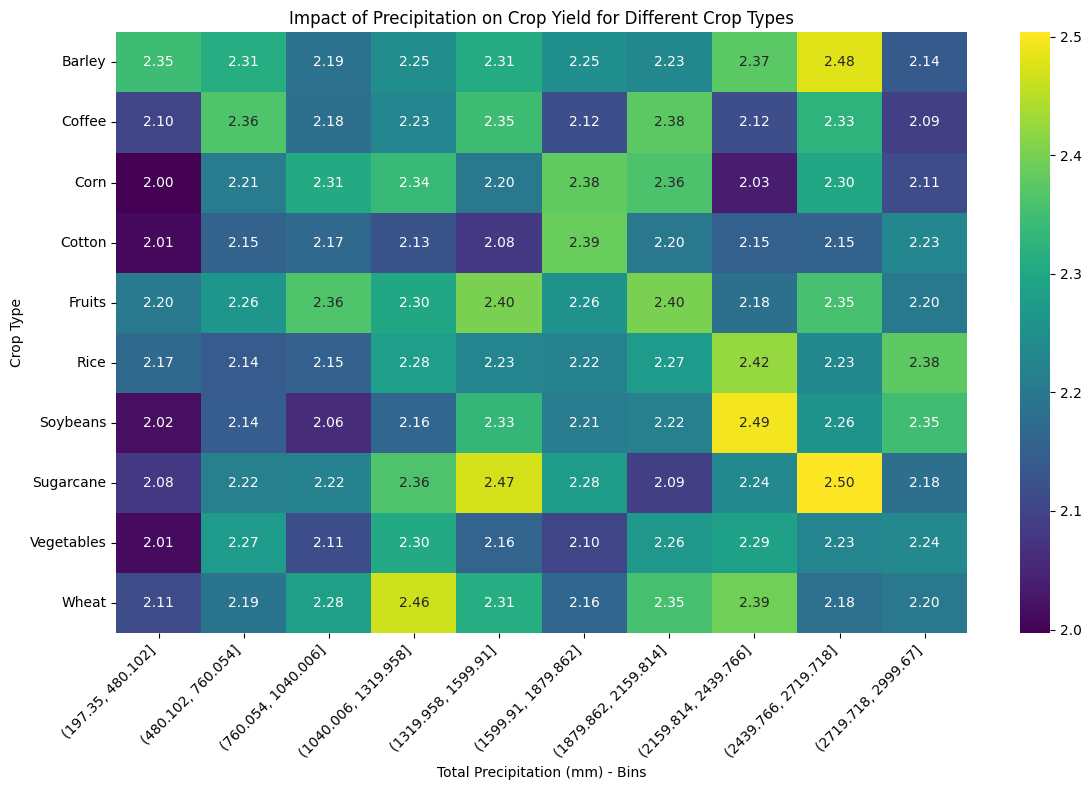

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by crop type and precipitation level, and calculate the average yield
crop_precip_yield = clim_df.groupby(['Crop_Type', pd.cut(clim_df['Total_Precipitation_mm'], bins=10)])['Crop_Yield_MT_per_HA'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = crop_precip_yield.pivot(index='Crop_Type', columns='Total_Precipitation_mm', values='Crop_Yield_MT_per_HA')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Impact of Precipitation on Crop Yield for Different Crop Types')
plt.xlabel('Total Precipitation (mm) - Bins')
plt.ylabel('Crop Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#General Trends:

# Yield Variation: There is significant variation in crop yields across different precipitation ranges and crop types. The color variations within the heatmap reflect this variability.

# Optimal Precipitation: Different crop types appear to have different optimal precipitation ranges for maximizing yield. This is indicated by the areas of the heatmap with the highest values (usually darker colors) for each crop type.

# Negative Impacts: Extremely low or extremely high precipitation levels generally seem to negatively impact crop yields for most crop types. The lower values (lighter colors) in the heatmap typically occur at the extreme ends of the precipitation ranges.

# Specific Crop Observations:

# Wheat: Wheat seems to perform relatively well across a broader range of precipitation compared to other crops.

# Rice: Rice appears to be particularly sensitive to variations in precipitation, with its yield being heavily influenced by the amount of rainfall received. It generally has higher yields in higher precipitation bins.

# Maize: Maize generally has lower yields in lower precipitation bins and is particularly sensitive to lower precipitation amounts compared to Rice.

# Soybeans: Similar to Rice, soybeans generally have lower yields in lower precipitation bins and have higher yields with increasing precipitation.